In [155]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [156]:
ticker = "^BVSP"
data = yf.Ticker(ticker).history(period="1mo")

<Axes: xlabel='Date'>

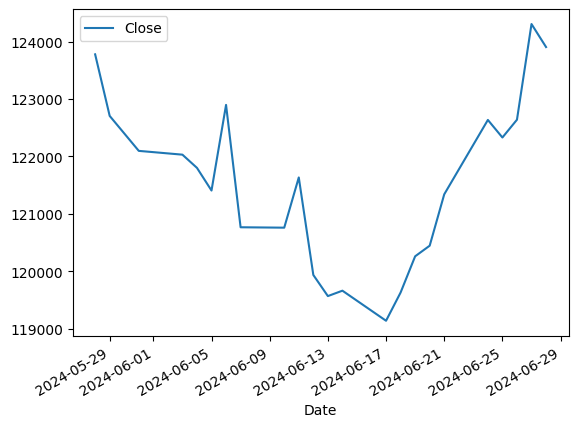

In [157]:
data.plot.line(y="Close", use_index=True)

In [158]:
data['Tomorrow_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Features e target
X = data[['Close', 'Volume']]
y = data['Tomorrow_Close']


In [159]:
n_samples = len(X)

test_size = 0.2
if n_samples <= 5:
    test_size = 0.1

In [160]:
# dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# demonstraçao do x_train
print(f"TREINO\n{X_train}\nTESTE\n{X_test}")

TREINO
                              Close    Volume
Date                                         
2024-06-05 00:00:00-03:00  121407.0   8768700
2024-06-26 00:00:00-03:00  122641.0   8178800
2024-06-13 00:00:00-03:00  119568.0   8543000
2024-06-03 00:00:00-03:00  122032.0   8428100
2024-06-04 00:00:00-03:00  121802.0   8529300
2024-06-21 00:00:00-03:00  121341.0  12906900
2024-06-14 00:00:00-03:00  119662.0   7847600
2024-06-24 00:00:00-03:00  122637.0   7836100
2024-06-20 00:00:00-03:00  120446.0   8659500
2024-05-31 00:00:00-03:00  122098.0  15918600
2024-06-11 00:00:00-03:00  121635.0   7477000
2024-06-27 00:00:00-03:00  124308.0   8707300
2024-06-07 00:00:00-03:00  120767.0   9801200
2024-06-12 00:00:00-03:00  119936.0  11278800
2024-06-18 00:00:00-03:00  119630.0   8100100
2024-06-25 00:00:00-03:00  122331.0   6942900
2024-06-06 00:00:00-03:00  122899.0   8404200
TESTE
                              Close   Volume
Date                                        
2024-05-28 00:00:00-03:

In [161]:
# criando normalizador de dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [162]:
# treinando o modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [163]:
# fazendo as previsões
y_pred = model.predict(X_test_scaled)
y_pred

array([123489.37739022, 119339.70216771, 120691.78433072, 122495.78709693,
       120196.20155659])

In [164]:
# avaliacao do modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"erro médio absoluto: {mae}")

erro médio absoluto: 532.6952864266466


In [165]:
# criterios de avaliacao do modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"erro medio absoluto: {mae}")
print(f"coeficiente de determinacao: {r2}")
print(f"erro percentual absoluto medio: {mape}%")

erro medio absoluto: 532.6952864266466
coeficiente de determinacao: 0.7107856071312915
erro percentual absoluto medio: 0.43777930272180704%


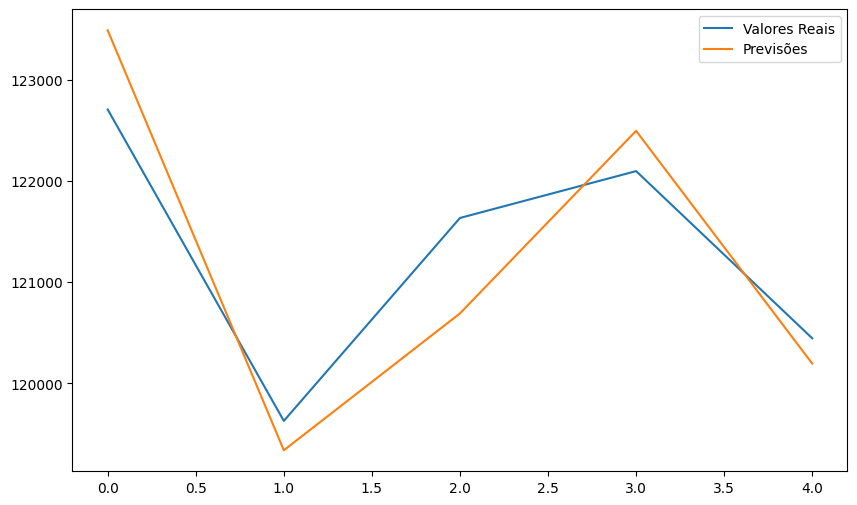

In [166]:
# vizualicao das previsoes
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Previsões')
plt.legend()
plt.show()